<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

# 📊 Análisis de Digitalización Comercial Regional

Este notebook presenta un análisis exploratorio sobre la presencia digital de comercios en distintas ciudades de la región.  
Se parte de un dataset consolidado con información sobre ubicación, categoría comercial, sitio web y nivel de calificación.

El objetivo es evaluar el grado de digitalización, identificar brechas informativas y detectar patrones de calidad percibida.

**Aspectos analizados:**
- Completitud de datos clave (`phone`, `street`, `website`)
- Presencia web por ciudad y por categoría comercial
- Distribución de plataformas digitales utilizadas
- Análisis de puntajes de calificación y percepción de calidad

> Este trabajo busca aportar una mirada clara y accionable sobre el estado actual de la digitalización comercial en la región.

</div>

In [150]:
# Importa librerías para manipulación de datos (pandas, numpy) y visualización (matplotlib, seaborn).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Crear carpeta si no existe
os.makedirs("Images", exist_ok=True)

pd.set_option('display.max_columns', None) 

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📥 Carga y exploración inicial del dataset

Se carga el archivo `Regional.csv` que contiene los datos consolidados de comercios.  
Luego se revisan dimensiones básicas del DataFrame para entender su estructura general.

</div>

In [151]:
# Carga el DataFrame regional limpio desde el archivo CSV.
df = pd.read_csv('../CleanData/Regional.csv')

In [152]:
# Muestra la cantidad de filas y columnas del DataFrame.
df.shape

(5859, 16)

In [153]:
# Muestra el número total de elementos (celdas) en el DataFrame.
df.size

93744

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🧠 Revisión estructural del DataFrame

Se utiliza `df.info()` para obtener una visión general del dataset:  
columnas disponibles, tipos de datos, cantidad de valores no nulos y uso de memoria.  
Esto permite detectar columnas incompletas o mal tipadas antes de avanzar con el análisis.

</div>

In [154]:
# Muestra estructura del DataFrame: columnas, tipos de datos, valores no nulos y uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5859 non-null   object 
 1   categoryName  5717 non-null   object 
 2   website       1750 non-null   object 
 3   street        5535 non-null   object 
 4   phone         4198 non-null   object 
 5   city          5806 non-null   object 
 6   state         5818 non-null   object 
 7   location/lat  5859 non-null   float64
 8   location/lng  5859 non-null   float64
 9   totalScore    4464 non-null   float64
 10  rank          5859 non-null   int64  
 11  imageUrl      5674 non-null   object 
 12  imagesCount   5672 non-null   float64
 13  reviewsCount  5859 non-null   int64  
 14  scrapedAt     5859 non-null   object 
 15  searchString  5859 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 732.5+ KB


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🧬 Tipos de datos por columna

Se revisan los tipos de datos de cada columna con `df.dtypes` para identificar variables numéricas, categóricas y de texto.  
Esto permite anticipar qué transformaciones o visualizaciones serán necesarias en el análisis exploratorio.

</div>

In [155]:
# Muestra los tipos de datos de cada columna para distinguir variables numéricas y categóricas.
df.dtypes

title            object
categoryName     object
website          object
street           object
phone            object
city             object
state            object
location/lat    float64
location/lng    float64
totalScore      float64
rank              int64
imageUrl         object
imagesCount     float64
reviewsCount      int64
scrapedAt        object
searchString     object
dtype: object

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🕒 Conversión de fechas para análisis temporal

Se transforma la columna `scrapedAt` al formato `datetime`, eliminando la zona horaria.  
Esto permite realizar comparaciones temporales futuras (por ejemplo, evolución de digitalización en próximos meses)  
y facilita la visualización limpia de fechas en gráficos o tablas.

</div>

In [156]:
# Convierte la columna 'scrapedAt' a formato datetime sin zona horaria para análisis temporal.
df['scrapedAt'] = pd.to_datetime(
    df['scrapedAt'], 
    errors='coerce',  # Maneja fechas inválidas sin romper el código
    utc=True          # Estandariza zona horaria para comparaciones
).dt.floor('s').dt.tz_localize(None)  # Elimina timezone para visualización limpia
df['scrapedAt']

0      2025-05-19 00:03:00
1      2025-05-19 00:03:02
2      2025-05-19 00:03:02
3      2025-05-19 00:03:02
4      2025-05-19 00:03:02
               ...        
5854   2025-07-30 15:10:41
5855   2025-07-30 15:10:41
5856   2025-07-30 15:10:56
5857   2025-07-30 15:10:58
5858   2025-07-30 15:10:59
Name: scrapedAt, Length: 5859, dtype: datetime64[ns]

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 👀 Inspección visual de registros

Se visualizan distintas partes del DataFrame para comprender su estructura y contenido:  
- Las primeras filas permiten validar el orden y formato general.  
- Las últimas filas pueden revelar registros recientes o inconsistencias.  
- Una muestra aleatoria ayuda a detectar variedad en los datos y posibles outliers.

</div>

In [157]:
# Muestra las primeras 10 filas del DataFrame para revisar la estructura general.
df.head(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,La Casa De Los Trofeos,Comercio,NaN,Rivadavia 496,NaN,Azul,Provincia de Buenos Aires,-36.774661,-59.862623,NaN,1,NaN,NaN,0,2025-05-19 00:03:00,Comercio
1,La Escoba Loca,Tienda De Artículos Para El Hogar,NaN,Colón Nte. 117,+54 9 2281 50-2996,Azul,Provincia de Buenos Aires,-36.767281,-59.851848,4.8,1,https://lh3.googleusercontent.com/gps-cs-s/AC9...,44.0,73,2025-05-19 00:03:02,Comercio
2,Artículos Magali,Tienda General,NaN,Monseñor Caneva Nte. 160,+54 9 2281 31-0611,Azul,Provincia de Buenos Aires,-36.774353,-59.841898,4.3,2,NaN,NaN,12,2025-05-19 00:03:02,Comercio
3,Autoservicio San Jorge,Comercio,NaN,Burgos Nte. 100,+54 9 2281 42-3119,Azul,Provincia de Buenos Aires,-36.768145,-59.851305,4.6,3,https://lh3.googleusercontent.com/p/AF1QipPV0V...,6.0,127,2025-05-19 00:03:02,Comercio
4,Asociacion Latina De Exportacion Sa,Comercio,NaN,Julio Argentino Roca 846,+54 9 2281 43-0338,Azul,Provincia de Buenos Aires,-36.785067,-59.859254,3.3,4,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,4,2025-05-19 00:03:02,Comercio
5,Jaque Mate,Comercio,NaN,"IAA, Colón 45",NaN,Azul,Provincia de Buenos Aires,-36.769319,-59.854343,5.0,5,https://lh3.googleusercontent.com/gps-cs-s/AC9...,11.0,2,2025-05-19 00:03:02,Comercio
6,Eco System Sa,Comercio,NaN,Av. Mujica,+54 9 2281 43-0966,Azul,Provincia de Buenos Aires,-36.766106,-59.836292,5.0,6,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,1,2025-05-19 00:03:02,Comercio
7,Despensa Y Anexos Biyo,Tienda De Alimentación,NaN,Aldaz 451-499,+54 9 2281 49-3233,Azul,Provincia de Buenos Aires,-36.764525,-59.846145,4.5,7,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,36,2025-05-19 00:03:02,Comercio
8,El Trueque Azul,Comercio,NaN,NaN,NaN,Azul,Provincia de Buenos Aires,-36.758668,-59.873928,4.0,8,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,10,2025-05-19 00:03:02,Comercio
9,La Fiambreria,Carnicería,NaN,Necochea 74 B7300FVB,NaN,Azul,Provincia de Buenos Aires,-36.773690,-59.850710,NaN,9,NaN,NaN,0,2025-05-19 00:03:02,Comercio


In [158]:
# Muestra las últimas 10 filas del DataFrame para detectar posibles patrones o registros recientes.
df.tail(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
5849,Polideportivo Municipal,Escuela Deportiva,NaN,NaN,NaN,Rauch,Provincia de Buenos Aires,-36.770290,-59.099804,5.0,7,https://lh3.googleusercontent.com/gps-cs-s/AC9...,2.0,20,2025-07-30 15:10:11,Deportivo
5850,Burbujas Lavandería,Servicio De Lavandería,NaN,Almte. Brown 254,+54 9 249 448-5227,Rauch,Provincia de Buenos Aires,-36.780576,-59.088608,5.0,16,https://lh3.googleusercontent.com/gps-cs-s/AC9...,7.0,39,2025-07-30 15:10:20,Ropa
5851,Bo. Jardín Empleados De Comercio,Complejo De Viviendas,NaN,Sin Nombre,NaN,Rauch,Provincia de Buenos Aires,-36.776126,-59.077801,4.4,25,NaN,NaN,30,2025-07-30 15:10:24,Comercio
5852,Taller Mecánico Juan Carlos Botta,Taller Mecánico,NaN,Azcuénaga 299-201,+54 9 249 450-1086,Rauch,Provincia de Buenos Aires,-36.772244,-59.079592,NaN,25,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,0,2025-07-30 15:10:27,Vehiculos
5853,Taller Mecanico Penedo,Taller De Automóviles,NaN,RP30 1400,+54 9 249 434-5802,Rauch,Provincia de Buenos Aires,-36.763515,-59.089012,NaN,30,https://lh3.googleusercontent.com/gps-cs-s/AC9...,7.0,0,2025-07-30 15:10:35,Vehiculos
5854,Cerrajeria Hugo,Cerrajero,NaN,Brandsen 1792,+54 9 2297 44-2572,Rauch,Provincia de Buenos Aires,-36.771912,-59.089686,4.6,19,https://lh3.googleusercontent.com/gps-cs-s/AC9...,3.0,20,2025-07-30 15:10:41,Construccion
5855,Signos Arte Grafico,Servicios De Diseño,NaN,Av. San Martín 920,+54 9 249 469-4342,Rauch,Provincia de Buenos Aires,-36.772835,-59.086239,NaN,16,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 15:10:41,Construccion
5856,Registro Nacional De La Propiedad Del Automotor,Agencia De Registro De Automóviles,NaN,Cnel. Suárez 86,+54 9 2297 44-0468,Rauch,Provincia de Buenos Aires,-36.776637,-59.089069,4.4,17,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,20,2025-07-30 15:10:56,Vehiculos
5857,Carpintería Tedesco Hermanos,Carpintero,NaN,"9 de Julio 145, B7203ABC",+54 9 249 435-9904,Rauch,Provincia de Buenos Aires,-36.775892,-59.093677,NaN,28,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,0,2025-07-30 15:10:58,Construccion
5858,Zapatería Tofi,Zapatero,NaN,Av. Gral. Paz,+54 9 249 421-6088,Rauch,Provincia de Buenos Aires,-36.777376,-59.078009,4.9,29,https://lh3.googleusercontent.com/gps-cs-s/AC9...,3.0,16,2025-07-30 15:10:59,Tienda


In [159]:
# Muestra aleatoriamente 10 filas del DataFrame para inspección rápida y diversidad de registros.
df.sample(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
3358,Reynas,Tienda De Ropa De Mujer,NaN,Gral. Rodríguez 915,+54 9 249 442-8361,Tandil,Provincia de Buenos Aires,-37.322482,-59.138819,NaN,124,https://lh3.googleusercontent.com/gps-proxy/AL...,5.0,0,2025-06-11 18:02:06,Comercio
2589,Qregalo,NaN,NaN,Pablo Fassina 6006,+54 9 2284 68-5294,Olavarría,Provincia de Buenos Aires,-36.903563,-60.282617,NaN,11,NaN,NaN,0,2025-07-30 14:43:21,Bazar
4521,Repuestos Y Accesorios Ml Sports,Tienda De Repuestos Para Automóviles,https://www.guia-dorada.com.ar/guia/aviso-repu...,Av. Monseñor Actis 1655,+54 9 249 468-2970,Tandil,Provincia de Buenos Aires,-37.309688,-59.111063,NaN,7,https://lh3.googleusercontent.com/p/AF1QipMkZ8...,91.0,0,2025-05-29 00:17:30,Online
4271,Vujade,Tienda De Ropa De Mujer,http://www.vujade.com.ar/,"Roser, Martín Fierro 92",+54 9 249 453-1680,Tandil,Provincia de Buenos Aires,-37.330768,-59.121212,5.0,34,https://lh3.googleusercontent.com/p/AF1QipNfZV...,2.0,2,2025-05-29 00:15:56,Ropa
1477,Kiosko Y Almacén Díaz Rosana,Tienda De Alimentación,NaN,"Club Atlético Pueblo Nuevo, Maipú 3198",+54 9 2284 21-8567,Olavarría,Provincia de Buenos Aires,-36.886627,-60.324885,5.0,19,https://lh3.googleusercontent.com/gps-proxy/AL...,2.0,3,2025-06-15 23:32:11,Tienda
2163,Diesel Centro S.A.,Tienda De Accesorios Para Camiones,https://www.dieselcentrosa.com.ar/,Av. del Valle 4054,+54 9 2284 55-5487,Olavarría,Provincia de Buenos Aires,-36.906496,-60.317136,4.7,50,https://lh3.googleusercontent.com/gps-cs-s/AC9...,13.0,121,2025-07-30 14:43:03,Repuestos
3079,Heladería Iglú,Heladería,NaN,Av. Alsina 2,+54 9 2292 45-1175,Benito Juárez,Provincia de Buenos Aires,-37.673513,-59.804528,4.2,173,https://lh3.googleusercontent.com/gps-cs-s/AC9...,8.0,42,2025-07-30 15:23:02,Comercio
5847,Los Vascos Ferreteria,Ferretería,NaN,NaN,NaN,Rauch,Provincia de Buenos Aires,-36.778145,-59.083316,NaN,172,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 15:10:08,Tienda
733,Frenos Y Embragues El Mono Fashion,Taller De Frenos,https://www.gurugo.com.ar/fichas/frenos-y-embr...,Av. Piazza 1102,+54 9 2281 42-3100,Azul,Provincia de Buenos Aires,-36.784896,-59.849515,4.5,86,https://lh3.googleusercontent.com/p/AF1QipPvMo...,44.0,26,2025-07-30 14:51:45,Tienda
3187,Estudio De Canto Y Venta De Instrumentos Music...,NaN,NaN,Dinamarca 322,+54 9 249 456-5480,Tandil,Provincia de Buenos Aires,-37.308870,-59.142597,5.0,2,https://lh3.googleusercontent.com/p/AF1QipN3bo...,48.0,3,2025-06-11 18:01:55,Venta


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Medición de completitud en `street` y `phone` por ciudad

1. Agrupamos por la columna **city**.
2. Para cada ciudad calculamos:
   - **Porcentaje de completitud** = registros distintos de `"Incomplete"`.
   - **Total de incompletos** = cantidad de registros con `"Incomplete"`.
3. Así obtenemos un DataFrame comparativo entre ciudades para evaluar la calidad de los datos.

> Este análisis permite identificar brechas de información y orientar esfuerzos de digitalización local.

</div>

In [160]:
completitud = (
    df.groupby('city').agg(
        phone_complete_porc=('phone', lambda x: round(x.notna().mean() * 100, 2)),
        street_complete_porc=('street', lambda x: round(x.notna().mean() * 100, 2)),
        phone_incomplete_total=('phone', lambda x: x.isna().sum()),
        street_incomplete_total=('street', lambda x: x.isna().sum())
    )
    .reset_index()
)
completitud

,city,phone_complete_porc,street_complete_porc,phone_incomplete_total,street_incomplete_total
0,Azul,64.26,93.11,451,87
1,Benito Juárez,62.75,93.41,130,23
2,Olavarría,76.02,95.84,357,62
3,Rauch,58.59,89.57,135,34
4,Tandil,75.84,96.76,575,77


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Completitud por ciudad en columnas clave

Este bloque calcula el porcentaje de registros **completos** (no nulos) y la cantidad de registros **incompletos** (nulos) por ciudad en las columnas `phone` y `street`.

- `phone_complete_porc`: Porcentaje de registros con teléfono presente.
- `street_complete_porc`: Porcentaje de registros con dirección (`street`) presente.
- `phone_incomplete_total`: Cantidad de registros sin teléfono.
- `street_incomplete_total`: Cantidad de registros sin dirección.

Los porcentajes se redondean a dos decimales para facilitar la lectura.

</div>

In [161]:
# Calcula el total de registros incompletos en 'phone' y 'street' a nivel general.
total_phone_incomplete = completitud['phone_incomplete_total'].sum()
total_street_incomplete = completitud['street_incomplete_total'].sum()

print(f"📊 Registros sin número de telefono ingresado: {total_phone_incomplete:,}")
print(f"📊 Registros sin dirección ingresada: {total_street_incomplete:,}")

📊 Registros sin número de telefono ingresado: 1,648
📊 Registros sin dirección ingresada: 283


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🌐 Resumen de presencia web a nivel general

Este bloque calcula cuántos negocios tienen sitio web registrado (`website`) y cuántos no, usando `notna()` para detectar valores presentes.

- `registros_con_web`: cantidad de negocios con sitio web.
- `porcentaje_con_web`: porcentaje sobre el total.
- Los faltantes se consideran como `np.nan`, ya estandarizados previamente.

Los resultados se imprimen con formato legible y porcentajes redondeados a dos decimales.

</div>

In [162]:
# Calcula el total de registros incompletos en 'website' a nivel general
total_registros = len(df)
registros_con_web = df['website'].notna().sum()
porcentaje_con_web = (registros_con_web / total_registros) * 100

print(f"\nResumen de Presencia Web a Nivel General \n---------------------------------------")
print(f"Total de negocios en la muestra: {total_registros:,}")
print(f"Negocios con sitio web: {registros_con_web:,} ({porcentaje_con_web:.2f}%)")
print(f"Negocios sin sitio web: {total_registros - registros_con_web:,} ({(100 - porcentaje_con_web):.2f}%)")


Resumen de Presencia Web a Nivel General 
---------------------------------------
Total de negocios en la muestra: 5,859
Negocios con sitio web: 1,750 (29.87%)
Negocios sin sitio web: 4,109 (70.13%)


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🏙️ Completitud de presencia web por ciudad

Se agrupan los registros por ciudad para evaluar la calidad de los datos en el campo `website`.  
Se construye una tabla resumen con las siguientes métricas:
- **Total de comercios** por ciudad.
- **Cantidad y porcentaje** de registros con y sin sitio web.
- **Ranking de ciudades** según nivel de completitud.

Este análisis permite identificar qué ciudades tienen mejor presencia digital y dónde se concentran las brechas de información.

</div>

In [163]:
# Genera una tabla resumen por ciudad con métricas de completitud en la columna 'website'
# Incluye totales, porcentajes y ranking de ciudades según calidad de datos

# Total de registros por ciudad
total_registros = df.groupby('city').size()

# Registros incompletos (website faltante) por ciudad
registros_incomplete = df[df['website'].isna()].groupby('city').size()

# Crear tabla resumen
resumen = pd.DataFrame({
    'Total Comercios': total_registros,
    'Website Incompletos': registros_incomplete,
}).fillna(0)

# Calcular completitud
resumen['Website Completos'] = resumen['Total Comercios'] - resumen['Website Incompletos']
resumen['% Completos'] = (resumen['Website Completos'] / resumen['Total Comercios'] * 100).round(2)
resumen['% Incompletos'] = (resumen['Website Incompletos'] / resumen['Total Comercios'] * 100).round(2)

# Ordenar por cantidad de comercios
resumen = resumen.sort_values('Total Comercios', ascending=False)

# Imprimir resultados
print("ANÁLISIS DE CALIDAD DE DATOS POR CIUDAD")
print("=" * 40)
print(f"Dataset: {resumen['Total Comercios'].sum():,} registros en {len(resumen)} ciudades")
print(f"Completitud global: {(resumen['Website Completos'].sum() / resumen['Total Comercios'].sum() * 100):.2f}%")
print()

print("TABLA COMPLETA POR CIUDAD:")
print("-" * 100)
print(resumen.to_string())

print(f"\nRANKING DE CIUDADES:")
print("-" * 55)
for i, (ciudad, row) in enumerate(resumen.iterrows(), 1):
    print(f"{i}. {ciudad:<12} | {row['Total Comercios']:>4} registros | {row['% Completos']:>5.2f}% completos")


ANÁLISIS DE CALIDAD DE DATOS POR CIUDAD
Dataset: 5,806 registros en 5 ciudades
Completitud global: 29.90%

TABLA COMPLETA POR CIUDAD:
----------------------------------------------------------------------------------------------------
               Total Comercios  Website Incompletos  Website Completos  % Completos  % Incompletos
city                                                                                              
Tandil                    2380                 1540                840        35.29          64.71
Olavarría                 1489                  994                495        33.24          66.76
Azul                      1262                  984                278        22.03          77.97
Benito Juárez              349                  286                 63        18.05          81.95
Rauch                      326                  266                 60        18.40          81.60

RANKING DE CIUDADES:
--------------------------------------------------

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📈 Estadísticas descriptivas y análisis comparativo

Se calculan métricas estadísticas sobre la completitud de datos por ciudad:  
- **Promedio, mediana, mínimo, máximo y desviación estándar** de la presencia web.  
- Se identifican las ciudades con mayor, menor y nivel medio de completitud.  
- Se calcula la **brecha porcentual** entre la mejor y la peor ciudad.  
- Se analiza la **correlación** entre el tamaño de la ciudad (cantidad de comercios) y su nivel de completitud.

> Este análisis permite entender la distribución de la digitalización comercial y detectar patrones regionales.

</div>

In [164]:
# Calcula estadísticas descriptivas y compara el nivel de completitud por ciudad.
# Identifica la mejor, peor y ciudad mediana, y analiza la correlación entre tamaño y completitud.
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 50)

stats = pd.DataFrame({
    'Métrica': ['Promedio', 'Mediana', 'Mínimo', 'Máximo', 'Desv. Estándar'],
    'Completitud %': [
        resumen['% Completos'].mean(),
        resumen['% Completos'].median(), 
        resumen['% Completos'].min(),
        resumen['% Completos'].max(),
        resumen['% Completos'].std()
    ],
    'Total Comercios': [
        resumen['Total Comercios'].mean(),
        resumen['Total Comercios'].median(),
        resumen['Total Comercios'].min(),
        resumen['Total Comercios'].max(),
        resumen['Total Comercios'].std()
    ]
}).round(2)

print(stats.to_string(index=False))

print(f"\nANÁLISIS COMPARATIVO:")
print("-" * 60)

mejor_ciudad = resumen.loc[resumen['% Completos'].idxmax()]
peor_ciudad = resumen.loc[resumen['% Completos'].idxmin()]
ciudad_media = resumen.loc[(resumen['% Completos'] - resumen['% Completos'].median()).abs().idxmin()]

print(f"🏆 MEJOR: {mejor_ciudad.name} - {mejor_ciudad['% Completos']:.2f}% completos ({mejor_ciudad['Total Comercios']} registros)")
print(f"📊 MEDIANA: {ciudad_media.name} - {ciudad_media['% Completos']:.2f}% completos ({ciudad_media['Total Comercios']} registros)")  
print(f"⚠️  PEOR: {peor_ciudad.name} - {peor_ciudad['% Completos']:.2f}% completos ({peor_ciudad['Total Comercios']} registros)")

brecha = mejor_ciudad['% Completos'] - peor_ciudad['% Completos']
print(f"📈 BRECHA: {brecha:.2f} puntos porcentuales entre mejor y peor")

# Correlación tamaño vs completitud
correlacion = resumen['Total Comercios'].corr(resumen['% Completos'])
print(f"\n🔗 CORRELACIÓN:")
print("-" * 60)
print(f"   Tamaño vs Completitud: {correlacion:.3f}")
if correlacion > 0.3:
    print("   → Ciudades más grandes tienden a tener mejor completitud")
elif correlacion < -0.3:
    print("   → Ciudades más grandes tienden a tener menor completitud") 
else:
    print("   → No hay relación clara entre tamaño y completitud")

ESTADÍSTICAS DESCRIPTIVAS
       Métrica  Completitud %  Total Comercios
      Promedio          25.40          1161.20
       Mediana          22.03          1262.00
        Mínimo          18.05           326.00
        Máximo          35.29          2380.00
Desv. Estándar           8.27           860.28

ANÁLISIS COMPARATIVO:
------------------------------------------------------------
🏆 MEJOR: Tandil - 35.29% completos (2380.0 registros)
📊 MEDIANA: Azul - 22.03% completos (1262.0 registros)
⚠️  PEOR: Benito Juárez - 18.05% completos (349.0 registros)
📈 BRECHA: 17.24 puntos porcentuales entre mejor y peor

🔗 CORRELACIÓN:
------------------------------------------------------------
   Tamaño vs Completitud: 0.917
   → Ciudades más grandes tienden a tener mejor completitud


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📈 Relación entre tamaño de ciudad y completitud web

Este gráfico de dispersión muestra cómo varía el porcentaje de presencia web (`% Completos`) en función del tamaño de cada ciudad (`Total Comercios`).

- Permite visualizar si hay una tendencia clara entre ciudades más grandes y mayor digitalización.
- Se complementa con el análisis de correlación realizado previamente.
- Las etiquetas de ciudad se muestran si el número de ciudades es manejable visualmente.

</div>

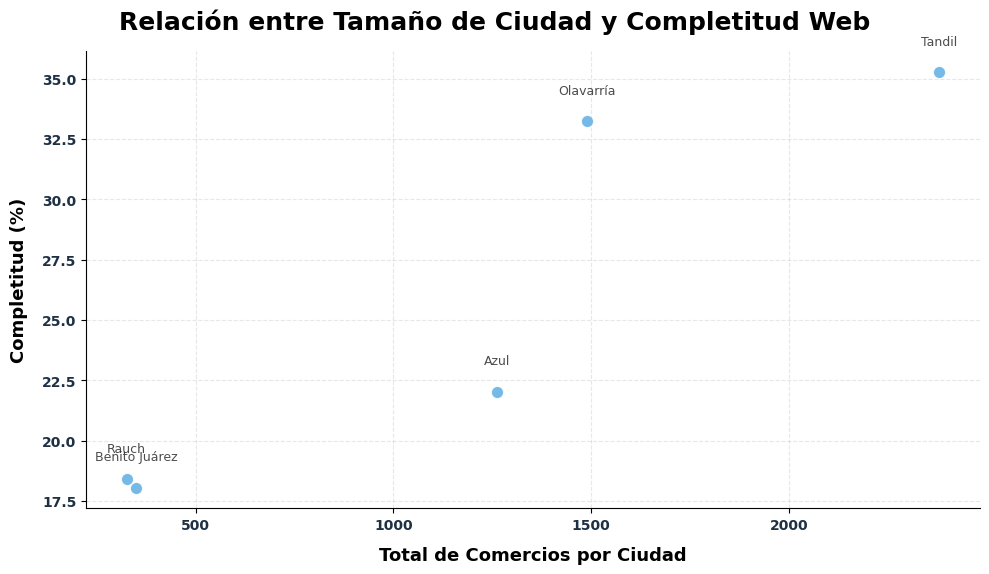

In [165]:
# Visualiza la relación entre tamaño de ciudad y completitud
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

ax.scatter(resumen['Total Comercios'], resumen['% Completos'], 
           s=80, color='#5DADE2', edgecolor='white', alpha=0.85)

# Títulos y ejes
fig.suptitle('Relación entre Tamaño de Ciudad y Completitud Web', fontsize=18, fontweight='bold', y=0.95)
ax.set_xlabel('Total de Comercios por Ciudad', fontsize=13, fontweight='bold', labelpad=10)
ax.set_ylabel('Completitud (%)', fontsize=13, fontweight='bold', labelpad=10)
ax.grid(True, linestyle='--', alpha=0.3)

# Etiquetas de ciudades (solo si hay pocos puntos)
if len(resumen) <= 20:
    for i, row in resumen.iterrows():
        ax.text(row['Total Comercios'], row['% Completos'] + 1, i, fontsize=9, ha='center', va='bottom', alpha=0.7)

# Estética
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.xticks(fontsize=10, fontweight='bold', color="#1E3144")
plt.yticks(fontsize=10, fontweight='bold', color="#1E3144")
plt.tight_layout()
plt.savefig("../Images/01-Presencia_web_por_ciudad", dpi=300, bbox_inches='tight')
plt.show()


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🧾 Conclusión

El gráfico muestra que las ciudades con más negocios suelen tener más presencia web. Tandil y Olavarría, que tienen muchos comercios, también tienen los porcentajes más altos de completitud. En cambio, Rauch y Benito Juárez tienen menos negocios y menos datos disponibles online.

Esto sugiere que las ciudades más grandes están más digitalizadas, mientras que las más chicas podrían necesitar más apoyo para mejorar su visibilidad en internet. Es un punto importante si se quiere entender cómo se distribuye la información comercial en distintas regiones.


</div>

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Visualización de presencia web por ciudad

Se genera un gráfico de barras apiladas que muestra el porcentaje de comercios con y sin sitio web en cada ciudad.  
Esto permite comparar visualmente el nivel de digitalización comercial entre regiones.

Además, se identifican las ciudades con:
- 🏆 **Mayor presencia web**
- ⚠️ **Menor presencia web**

> Esta visualización resume el estado actual de la digitalización comercial y destaca las brechas regionales.

</div>

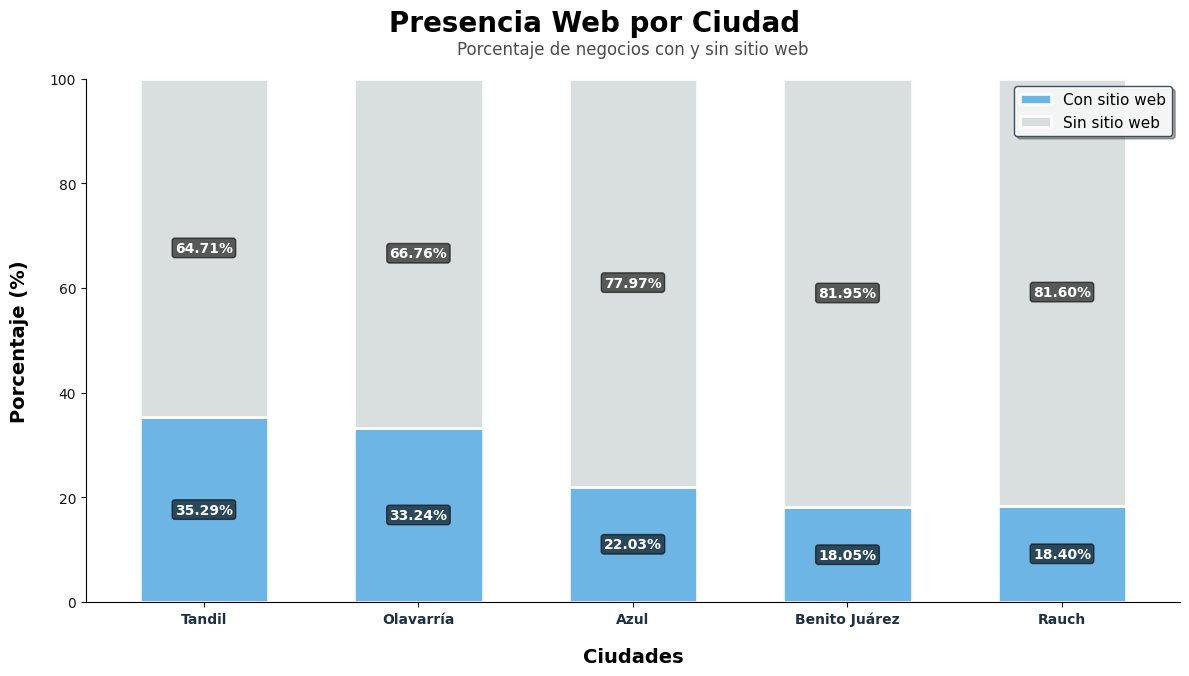

🏆 Tandil tiene el mayor porcentaje de presencia web: 35.29%
⚠️ Benito Juárez tiene el menor porcentaje de presencia web: 18.05%


In [166]:
# Genera gráfico de barras apiladas mostrando la presencia web por ciudad
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')

# Calcular porcentaje de comercios sin sitio web (np.nan)
resumen['% Incompletos'] = 100 - resumen['% Completos']

# Gráfico de barras apiladas
ax = resumen[['% Completos', '% Incompletos']].plot(
    kind='bar', stacked=True, ax=ax,
    color=["#5DADE2", "#D5DBDB"],  # azul para completos, gris claro para faltantes
    width=0.6, edgecolor='white', linewidth=2, alpha=0.9
)

# Títulos y configuración
fig.suptitle('Presencia Web por Ciudad', fontsize=20, fontweight='bold', y=0.96)
ax.text(0.5, 1.04, 'Porcentaje de negocios con y sin sitio web', transform=ax.transAxes,
        fontsize=12, ha='center', va='bottom', alpha=0.7)
ax.set_ylabel('Porcentaje (%)', fontsize=14, fontweight='bold', labelpad=15)
ax.set_xlabel('Ciudades', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 20))

# Leyenda clara
ax.legend(['Con sitio web', 'Sin sitio web'], loc='upper right', bbox_to_anchor=(1, 1),
          frameon=True, shadow=True, fancybox=True, fontsize=11, facecolor='white',
          edgecolor='#2C3E50', framealpha=0.9)

# Etiquetas en barras
for c in ax.containers:
    ax.bar_label(c, labels=[f'{w:.2f}%' if w > 5 else '' for w in c.datavalues],
                 label_type='center', color='white', fontweight='bold', fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6))

# Estética
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=10, colors="#131516")
plt.xticks(rotation=45 if len(resumen) > 8 else 0,
           ha='right' if len(resumen) > 8 else 'center',
           fontweight='bold', fontsize=10, color="#1E3144")

plt.tight_layout()

plt.show()

# Identificar ciudades con mayor y menor presencia web
mejor_web = resumen.loc[resumen['% Completos'].idxmax()]
peor_web = resumen.loc[resumen['% Completos'].idxmin()]

print(f'🏆 {mejor_web.name} tiene el mayor porcentaje de presencia web: {mejor_web["% Completos"]:.2f}%')
print(f'⚠️ {peor_web.name} tiene el menor porcentaje de presencia web: {peor_web["% Completos"]:.2f}%')


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🏪 Categorías con datos completos

Se filtran los registros que tienen información completa en todas las columnas.  
Luego se analiza la frecuencia de cada categoría comercial dentro de ese subconjunto.

Las categorías con mayor cantidad de registros completos son:
- **Tienda de Ropa**
- **Agencia Inmobiliaria**
- **Tienda de Materiales para la Construcción**

> Este análisis permite identificar qué rubros están mejor representados digitalmente.

</div>

In [167]:
# Crea un nuevo DataFrame con registros que no contienen 'Incomplete' en ninguna columna.
df_full_records = df[~(df == 'Incomplete').any(axis=1)].copy()

# Muestra la frecuencia de cada categoría entre los registros con datos completos.
df_full_records['categoryName'].value_counts()


categoryName
Tienda De Ropa                         464
Tienda De Alimentación                 366
Comercio                               333
Agencia Inmobiliaria                   180
Taller De Reparación De Automóviles    141
                                      ... 
Escuela De Artes Marciales               1
Tienda De Cristales Y Espejos            1
Complejo De Viviendas                    1
Cerrajero                                1
Zapatero                                 1
Name: count, Length: 620, dtype: int64

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🌐 Detección de dominios propios

Se analiza la columna `website` para identificar comercios que utilizan dominio propio.  
Se excluyen URLs que contienen plataformas conocidas (como redes sociales, marketplaces o constructores gratuitos).  
El resultado muestra cuántos negocios tienen una página web con dominio personalizado, lo que indica mayor nivel de digitalización.

> Este indicador permite diferenciar entre presencia web básica y profesional.

</div>

In [168]:
# Define lista de plataformas y términos comunes en URLs que no representan dominio propio
word = ['facebook', 'instagram', 'mercadolibre', 'mercadoshops', 'tiendanube', 'paginasamarillas', 
        'guia-dorada', 'gurugo', 'wa.me', 'sites.google.', 'region20']
# Excluir registros sin sitio web (np.nan)
valid_webs = df['website'].notna()
# Crea una máscara booleana para detectar URLs que contienen alguno de esos términos
contains_word = df.loc[valid_webs, 'website'].str.contains('|'.join(word), case=False)
# Cuenta los registros cuya URL no contiene ninguno de esos términos (presunto dominio propio)
dominio_Propio = (~contains_word).sum()


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🧮 Distribución de plataformas web utilizadas

Se analiza la columna `website` para identificar qué plataformas utilizan los comercios en su presencia digital.  
Se agrupan los resultados según un diccionario de términos comunes (redes sociales, marketplaces, constructores web, etc.).  
También se incluye la categoría de **Dominio Propio**, que representa sitios personalizados.

> Esta tabla permite entender cómo se distribuye la digitalización comercial entre plataformas gratuitas, redes sociales y sitios profesionales.

</div>

In [169]:
# Define diccionario de plataformas y términos comunes en URLs para agrupar presencia web
words_dict = {
    'facebook': 'Facebook',
    'instagram': 'Instagram',
    'mercadolibre': 'Mercado Libre',
    'mercadoshops': 'MercadoShops',
    'tiendanube': 'TiendaNube',
    'paginasamarillas': 'Páginas Amarillas',
    'guia-dorada': 'Guía Dorada',
    'gurugo': 'Gurugo',
    'wa.me': 'WhatsApp',
    'sites.google.': 'Google Sites',
    'pedidosya': 'PedidosYa',
    'region20': 'Región20'
}

# Cuenta cuántos comercios tienen cada tipo de presencia web según el diccionario
result = pd.Series({
    label: df['website'].str.contains(word, case=False, na=False).sum()
    for word, label in words_dict.items()
})

# Calcula el total de comercios con sitio web registrado (excluyendo np.nan)
webs = df['website'].notna().sum()

# Agrega la cantidad de comercios con dominio propio
result["Dominio Propio"] = dominio_Propio

# Crea tabla resumen con conteo y porcentaje por tipo de presencia web
result_df = pd.DataFrame({
    "count": result,
    "percentage": (result / webs * 100).round(2)
}).sort_values("count", ascending=False)

result_df


,count,percentage
Dominio Propio,941,53.77
Instagram,337,19.26
Facebook,317,18.11
Guía Dorada,68,3.89
TiendaNube,35,2.00
WhatsApp,15,0.86
Google Sites,13,0.74
Gurugo,8,0.46
MercadoShops,8,0.46
Región20,5,0.29


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Preferencia de plataformas digitales

Se visualiza la distribución de presencia digital entre plataformas utilizadas por los comercios.  
El gráfico muestra cuántos negocios utilizan cada tipo de sitio web, red social o marketplace.

**Principales hallazgos:**
- 🏆 **Dominio Propio** lidera con el 53.77% de los casos, asociado a cadenas nacionales o negocios con inversión digital.
- 📱 **Instagram (19.26%)** y **Facebook (18.11%)** son las redes sociales más utilizadas.
- 📉 Las otras redes se usan muy poco, lo que muestra que los negocios prefieren plataformas simples y visuales para llegar a sus clientes.

> Este análisis revela una polarización en la digitalización comercial, donde pocos canales concentran la mayoría de la presencia online.

</div>

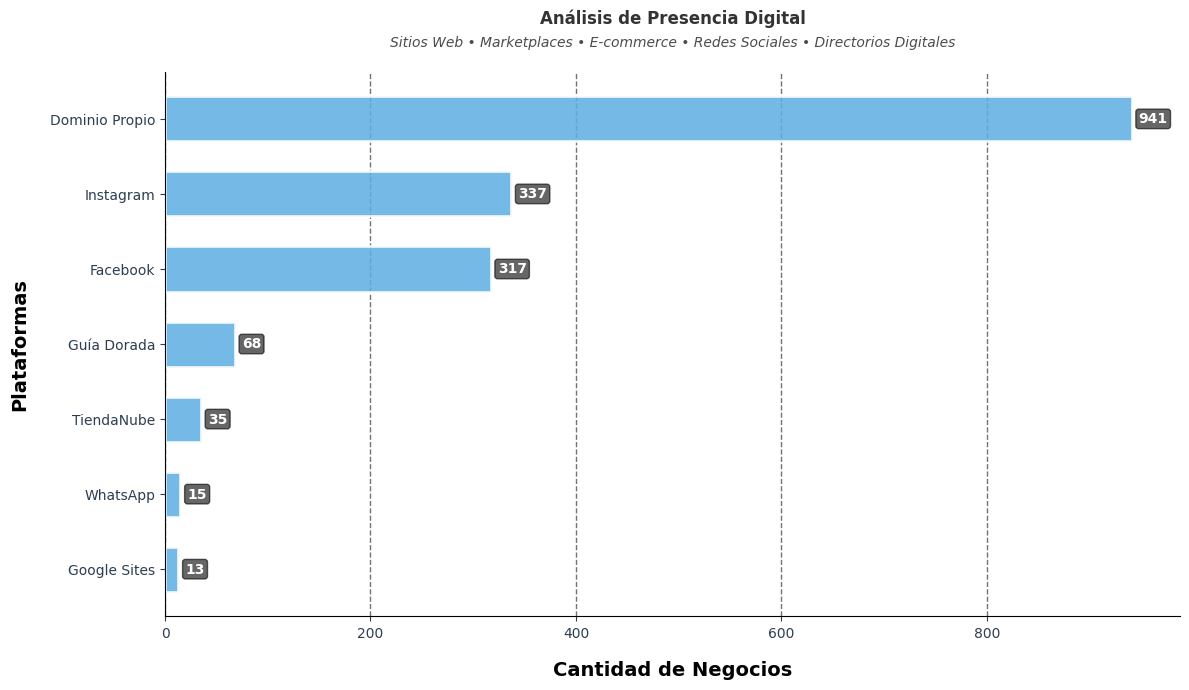

In [170]:
# Filtra plataformas con más de 10 registros y ordena para visualización.
result_df_filtered = result_df[result_df["count"] > 10]
# Invertir orden para que mayor cantidad esté arriba
df_sorted = result_df_filtered.iloc[::-1]
# Genera gráfico de barras horizontales mostrando cantidad de comercios por plataforma digital.
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')

# Gráfico de barras horizontales
bars = ax.barh(df_sorted.index, df_sorted["count"], color='#5DADE2', 
               edgecolor='white', linewidth=2, alpha=0.85, height=0.6)

# Títulos
ax.text(0.5, 1.08, 'Análisis de Presencia Digital', 
        transform=ax.transAxes, fontsize=12, ha='center', va='bottom', fontweight='bold', alpha=0.8)
ax.text(0.5, 1.04, 'Sitios Web • Marketplaces • E-commerce • Redes Sociales • Directorios Digitales', 
        transform=ax.transAxes, fontsize=10, ha='center', va='bottom', alpha=0.7, style='italic')

# Etiquetas en barras
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height()/2), 
                xytext=(5, 0), textcoords="offset points", ha='left', va='center', 
                fontweight='bold', fontsize=10, color='white',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6))

# Configuración de ejes y grid
ax.set(xlabel="Cantidad de Negocios", ylabel="Plataformas")
ax.set_xlabel("Cantidad de Negocios", fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel("Plataformas", fontsize=14, fontweight='bold', labelpad=15)
ax.xaxis.grid(True, linestyle='--', alpha=0.9, color="#646363", linewidth=1)
ax.set_axisbelow(True)

# Limpieza de bordes y formato
for spine in ['top', 'right']: ax.spines[spine].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10, colors='#2C3E50')
plt.tight_layout(); 
plt.savefig("../Images/03-Análisis_de_presencia_digital.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Análisis de distribución por categorías comerciales

Se agrupan los registros por `categoryName` para identificar los rubros más representados.  
Se calcula la cantidad de comercios por categoría, su porcentaje sobre el total y el número total de categorías únicas.

**Resultados principales:**
- 🧥 **Tienda de Ropa**: 464 comercios (7.92%)
- 🛒 **Tienda de Alimentación**: 366 comercios (6.25%) 
- 🏪 **Comercio**: 333 comercios (5.68%)

🔍 **Problema detectado: demasiadas categorías**
El dataset contiene **621 categorías diferentes**, lo que genera:
- Porcentajes muy bajos incluso en las más frecuentes.
- Datos dispersos y difícil agrupamiento.
- Obstáculos para detectar patrones claros.

📈 **Implicancias:**
- Los comercios están clasificados de forma muy específica.
- Es necesario agrupar categorías similares para facilitar el análisis.
- Ejemplo: "Tienda de Ropa", "Ropa" e "Indumentaria" podrían consolidarse.

> **Conclusión**: Aunque la diversidad es alta, una clasificación más general permitiría obtener insights más robustos.

</div>

In [171]:
# Agrupa los registros por categoría comercial y cuenta la cantidad de comercios en cada una.
category_counts = (
    df.groupby(['categoryName'])
    .size()
    .reset_index(name='website_count')
    .sort_values(by='website_count', ascending=False)
)

# Calcula el porcentaje que representa cada categoría sobre el total.
category_counts['percentage'] = (
    category_counts['website_count'] / category_counts['website_count'].sum() * 100
).round(2)
category_counts

,categoryName,website_count,percentage
572,Tienda De Ropa,464,8.12
443,Tienda De Alimentación,366,6.40
90,Comercio,333,5.82
14,Agencia Inmobiliaria,180,3.15
426,Taller De Reparación De Automóviles,141,2.47
...,...,...,...
3,Agencia De Alquiler De Grúas,1,0.02
616,Wood Supplier,1,0.02
617,Zapatero,1,0.02
2,Agencia De Alquiler De Cabañas,1,0.02


In [172]:
# Mide la cantidad total de categorías únicas en el dataset.
total_categorias = df['categoryName'].nunique()
print(f"Total de categorías distintas: {total_categorias}")

Total de categorías distintas: 620


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 🏆 Top 5 categorías con mayor presencia online

Se visualizan las cinco categorías comerciales con más registros en el dataset.  
El gráfico muestra cuántos comercios tienen presencia digital en cada una de ellas.

> Esta visualización permite identificar los rubros más activos en términos de digitalización y sirve como punto de partida para segmentaciones más profundas.

</div>


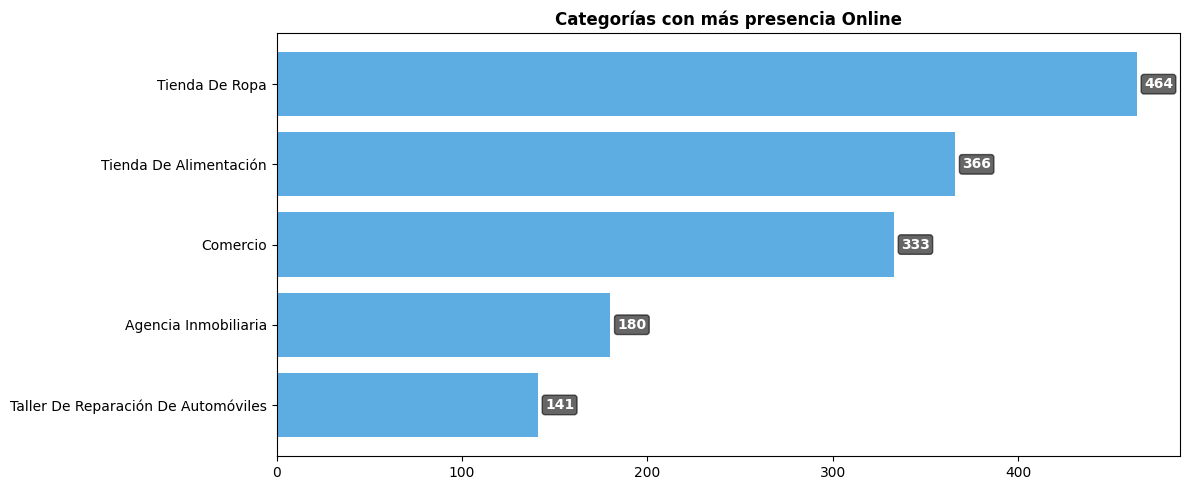

In [173]:
# Selecciona las 5 categorías con mayor cantidad de comercios.
top5 = category_counts.head(5)

# Genera gráfico de barras horizontales mostrando la cantidad de comercios por categoría.
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.barh(
    top5['categoryName'],
    top5['website_count'],
    color="#5DADE2",
    label="Cantidad de websites"
)
# Invierte el eje Y para que la categoría con más registros aparezca arriba.
ax.invert_yaxis()

# Agrega título al gráfico.
ax.set_title("Categorías con más presencia Online", fontsize=12, fontweight="bold")

# Añade etiquetas con valores sobre cada barra.
for bar in bars:
    width = bar.get_width()
    ax.annotate(
        f'{int(width)}',
        xy=(width, bar.get_y() + bar.get_height()/2),
        xytext=(5, 0),
        textcoords="offset points",
        ha='left', va='center',
        fontweight='bold', fontsize=10, color='white',
        bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6)
    )
# Ajusta el diseño del gráfico.
plt.tight_layout()
plt.savefig("../Images/04-Categorias_con_mas_presencia.png", dpi=300, bbox_inches='tight')
plt.show()


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### ⭐ Distribución de puntuaciones comerciales

Se analiza la columna `totalScore` para conocer cuántos comercios tienen cada nivel de puntuación.  
Esto permite detectar si los puntajes están concentrados en ciertos valores (por ejemplo, entre 4.0 y 4.5)  
y evaluar la consistencia en la percepción de calidad.

> Este análisis puede revelar sesgos en la calificación o confirmar una tendencia positiva general.

</div>

In [174]:
# Muestra la frecuencia de cada valor en la columna 'totalScore', ordenado de mayor a menor.
df['totalScore'].value_counts().sort_values(ascending=False)

totalScore
5.0    1206
4.5     424
4.7     403
4.6     396
4.8     376
4.4     313
4.3     268
4.9     214
4.0     198
4.2     151
4.1     114
3.0      70
3.8      59
3.7      58
3.9      39
1.0      38
3.5      25
2.0      21
3.6      20
3.3      19
3.4      12
2.3      11
2.5       5
3.1       4
2.9       3
2.7       3
1.8       2
1.9       2
2.8       2
3.2       2
2.4       1
1.5       1
1.3       1
2.6       1
2.1       1
1.7       1
Name: count, dtype: int64

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Distribución de puntajes de calificación

Este gráfico muestra cómo se distribuyen los puntajes asignados a los comercios según su presencia web.

- Los puntajes se agrupan en categorías como *Malo*, *Regular*, *Bueno*, *Muy bueno* y *Excelente*.
- Los comercios sin puntaje registrado o con puntaje igual a 0 se agrupan como **"Sin calificar"**.
- Esto permite visualizar claramente cuántos negocios aún no tienen una evaluación digital.

> En general, los negocios se concentran en la parte alta de la escala, lo que refleja buena percepción de los clientes.  
> Sin embargo, el alto porcentaje sin calificar indica que aún falta información en muchos casos.

> Esta visualización ayuda a detectar oportunidades de mejora y a entender cómo se percibe la calidad digital en el conjunto de datos.

</div>

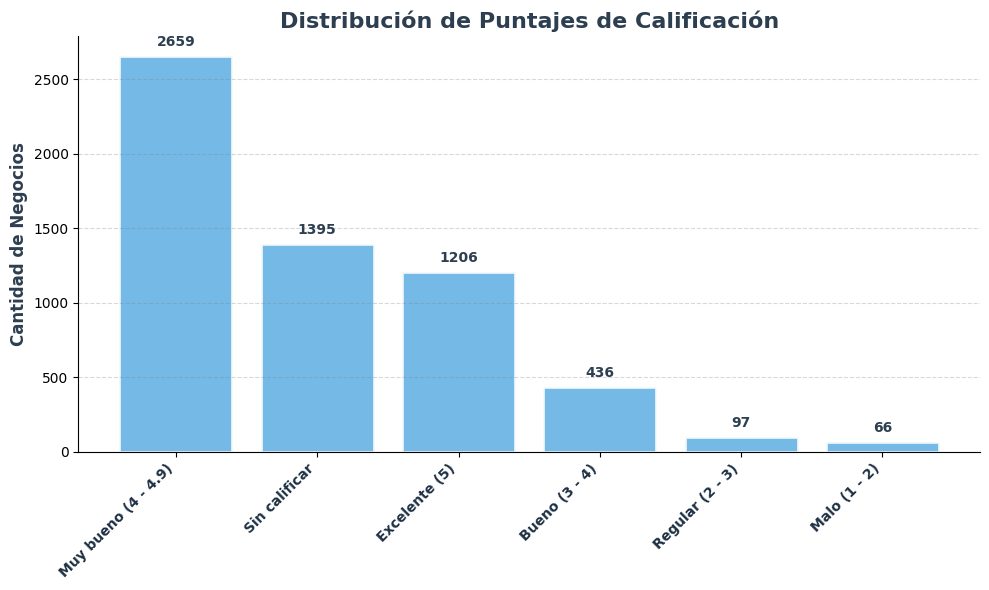

📊 Estadísticas por categorías:
🔹 Muy bueno (4 - 4.9): 2,659 negocios (45.38%)
🔹 Sin calificar: 1,395 negocios (23.81%)
🔹 Excelente (5): 1,206 negocios (20.58%)
🔹 Bueno (3 - 4): 436 negocios (7.44%)
🔹 Regular (2 - 3): 97 negocios (1.66%)
🔹 Malo (1 - 2): 66 negocios (1.13%)


In [175]:
# Función para categorizar puntajes
def categorize_score(score):
    if pd.isna(score): return "Sin calificar"
    elif score == 0: return "Sin calificar"
    elif score <= 2: return "Malo (1 - 2)"
    elif score <= 3: return "Regular (2 - 3)"
    elif score <= 4: return "Bueno (3 - 4)"
    elif score < 5: return "Muy bueno (4 - 4.9)"
    else: return "Excelente (5)"

# Aplica la función y crea columna categórica
df['score_category'] = df['totalScore'].apply(categorize_score)

# Cuenta registros por categoría (ahora incluye "Sin calificar")
cat_counts = df['score_category'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6), facecolor='white')
bars = plt.bar(range(len(cat_counts)), cat_counts.values, color='#5DADE2',
               alpha=0.85, edgecolor='white', linewidth=2)

# Título
plt.title('Distribución de Puntajes de Calificación', fontsize=16, fontweight='bold', color='#2C3E50')

# Ejes
plt.xticks(range(len(cat_counts)), cat_counts.index, rotation=45, ha='right',
           fontsize=10, fontweight='bold', color="#1E3144")
plt.ylabel('Cantidad de Negocios', fontsize=12, fontweight='bold', color='#2C3E50')

# Etiquetas en barras
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom',
                 fontweight='bold', fontsize=10, color='#2C3E50')

# Estética
plt.grid(True, alpha=0.3, axis='y', linestyle='--', color='gray')
for spine in ['top', 'right']: plt.gca().spines[spine].set_visible(False)
plt.tight_layout()
plt.savefig("../Images/05-Distribucion_puntajes.png", dpi=300, bbox_inches='tight')
plt.show()

# Estadísticas por categoría
print("📊 Estadísticas por categorías:")
for category, count in cat_counts.items():
    print(f"🔹 {category}: {count:,} negocios ({count/len(df)*100:.2f}%)")

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Distribución de puntuaciones altas (entre 4.0 y 5.0)
Este gráfico se enfoca exclusivamente en los puntajes más elevados para entender mejor cómo se distribuye la percepción positiva entre los comercios.
Se genera un histograma con suavizado KDE que muestra con precisión dónde se concentran las calificaciones más altas.
Este análisis complementa la visión general de puntajes, destacando los niveles de excelencia alcanzados.
**Hallazgos clave:**

🔵 Concentración entre 4.0 y 4.5: La mayoría de los negocios reciben calificaciones altas, lo que indica una experiencia satisfactoria.
🟢 Pico en 5.0: Muchos comercios alcanzan la puntuación máxima, reflejando excelencia en su presencia digital.

Este análisis refuerza la idea de una cultura de calidad consolidada, aunque también señala que hay margen para que más negocios alcancen el nivel máximo.

</div>


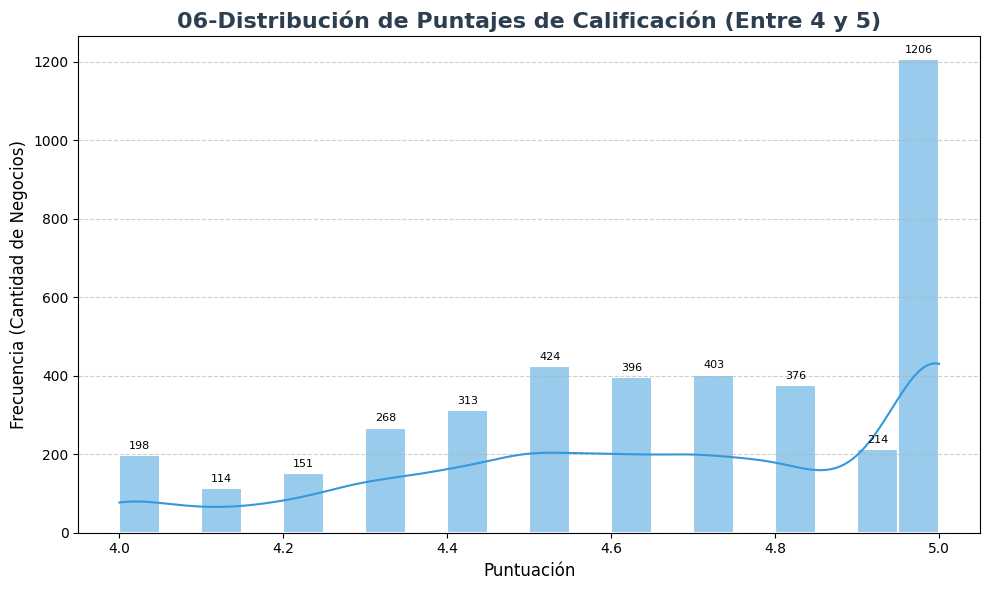

In [176]:
# Filtra los registros con puntajes entre 4 y 5 para analizar la distribución de calificaciones altas.
puntajes_4_a_5 = df[(df['totalScore'] >= 4) & (df['totalScore'] <= 5)]

# Genera histograma con KDE para visualizar la frecuencia de puntajes altos.
plt.figure(figsize=(10, 6), facecolor='white')
ax = sns.histplot(
    data=puntajes_4_a_5,
    x='totalScore',
    bins=20,
    kde=True,
    color='#3498db',
    edgecolor='white',
    linewidth=1.5
)

# Añade etiquetas numéricas sobre cada barra para facilitar la lectura.
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=8
        )

# Personaliza estética del gráfico.
plt.title('06-Distribución de Puntajes de Calificación (Entre 4 y 5)', fontsize=16, fontweight='bold', color='#2C3E50')
plt.xlabel('Puntuación', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Negocios)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("../Images/02-Porcentaje_presencia_x_ciudad.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [177]:
print("📋 RESUMEN DEL ANÁLISIS")
print("=" * 50)
# Total de ciudades
print(f"🏙️ Total de ciudades analizadas: {len(resumen)}")
# Total de comercios
print(f"🏪 Total de comercios: {len(df):,} registros")
# Promedio de presencia web
print(f"🌐 Presencia web promedio: {resumen['% Completos'].mean():.2f}%")
# Ciudad con mayor presencia web
print(f"🏆 Ciudad con mayor presencia web: {mejor_web.name} ({mejor_web['% Completos']:.2f}%)")
# Ciudad con menor presencia web
print(f"⚠️ Ciudad con menor presencia web: {peor_web.name} ({peor_web['% Completos']:.2f}%)")
# Categoría más frecuente
categoria_top = category_counts.iloc[0]
print(f"📦 Categoría más frecuente: {categoria_top['categoryName']} ({categoria_top['website_count']:,} registros)")
# Porcentaje con dominio propio
print(f"🔗 Porcentaje con Dominio Propio: {result_df.loc['Dominio Propio', 'percentage']:.2f}%")
# Puntaje promedio
print(f"⭐ Puntaje promedio (Máximo 5): {df['totalScore'].mean():.2f}")
# Porcentaje sin calificar
sin_calificar = (df['score_category'] == 'Sin calificar').mean() * 100
print(f"📉 Porcentaje sin calificar: {sin_calificar:.2f}%")

📋 RESUMEN DEL ANÁLISIS
🏙️ Total de ciudades analizadas: 5
🏪 Total de comercios: 5,859 registros
🌐 Presencia web promedio: 25.40%
🏆 Ciudad con mayor presencia web: Tandil (35.29%)
⚠️ Ciudad con menor presencia web: Benito Juárez (18.05%)
📦 Categoría más frecuente: Tienda De Ropa (464 registros)
🔗 Porcentaje con Dominio Propio: 53.77%
⭐ Puntaje promedio (Máximo 5): 4.52
📉 Porcentaje sin calificar: 23.81%


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📌 **Conclusión General**

El análisis revela una digitalización comercial desigual entre ciudades y categorías:

- 🏙️ **Ciudades más grandes** como Tandil y Olavarría muestran mayor presencia web y mejor completitud de datos.
- 🏪 **Categorías como Tienda de Ropa y Agencia Inmobiliaria** lideran en registros completos y presencia digital.
- 🌐 **Dominio Propio** representa más del 50% de los sitios web, lo que indica inversión en identidad digital.
- 📱 **Instagram y Facebook** son las redes sociales más utilizadas, aunque con menor peso que los sitios personalizados.
- 📈 **Puntajes de calificación** se concentran entre 4.0 y 4.5, con un pico en 5.0, lo que refleja una percepción positiva general.
- ⚠️ **Más del 30% de los comercios no están calificados**, lo que sugiere falta de información en muchos casos.

> En conjunto, los datos muestran una cultura digital en crecimiento, pero con brechas claras que deben ser atendidas para lograr una digitalización más equitativa y robusta.

</div>

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">


</div>